# General import functions

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import scanpy as sc
from igraph import *
from MulticoreTSNE import MulticoreTSNE as TSNE #faster TSNE alternative
from anndata import read_h5ad
from anndata import read_csv
sc.logging.print_versions()

scanpy==1.4.5.dev115+g52e25b5 anndata==0.6.22.post2.dev68+g92b6791 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [4]:
pwd

'/Users/angela.pisco/src/sapiens/tabula-sapiens/analysis-scripts'

# Load the data

In [5]:
tissue = 'Bladder'

In [54]:
tiss_facs = read_h5ad('/maca-bulk/sapiens/tabula-sapiens-facs-pilot-filtered-Bladder.h5ad')
tiss_droplet = read_h5ad('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-bladder.h5ad')
tiss_facs, tiss_droplet


(AnnData object with n_obs × n_vars = 762 × 24697 
     obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes'
     var: 'n_cells', AnnData object with n_obs × n_vars = 17469 × 21380 
     obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes'
     var: 'n_cells')

In [ ]:
bladder_louvain_cell_ontology_droplet = {}
bladder_louvain_cell_ontology_droplet['0'] = ...
bladder_louvain_cell_ontology_droplet

In [ ]:
tiss.obs['cell_ontology_class'] = tiss.obs['louvain'].map(bladder_louvain_cell_ontology_droplet)
set(tiss.obs['cell_ontology_class'])

# Load the data

In [ ]:
adata

In [ ]:
set(adata.obs['tissue'])

Filter out cells with less than 200 genes detected and genes expressed in less than 3 cells

In [ ]:
adata

save the filtered data

In [ ]:
adata.write('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered.h5ad')

# Annotate the FACS data

In [275]:
tiss_facs = read_h5ad('/maca-bulk/sapiens/tabula-sapiens-facs-pilot-filtered-Bladder.h5ad')

adata = tiss_facs
adata

AnnData object with n_obs × n_vars = 762 × 24697 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes'
    var: 'n_cells'

In [279]:
igg_genes = adata.var_names[adata.var_names.str.startswith('MIT')]
igg_genes

Index(['MITD1', 'MITF'], dtype='object', name='index')

In [277]:
ercc_genes = adata.var_names[adata.var_names.str.startswith('ERCC-')]
ercc_genes

Index(['ERCC-00002', 'ERCC-00003', 'ERCC-00004', 'ERCC-00009', 'ERCC-00012',
       'ERCC-00013', 'ERCC-00014', 'ERCC-00019', 'ERCC-00022', 'ERCC-00024',
       'ERCC-00025', 'ERCC-00028', 'ERCC-00031', 'ERCC-00033', 'ERCC-00034',
       'ERCC-00035', 'ERCC-00039', 'ERCC-00042', 'ERCC-00043', 'ERCC-00044',
       'ERCC-00046', 'ERCC-00051', 'ERCC-00053', 'ERCC-00054', 'ERCC-00058',
       'ERCC-00059', 'ERCC-00060', 'ERCC-00062', 'ERCC-00067', 'ERCC-00069',
       'ERCC-00071', 'ERCC-00073', 'ERCC-00074', 'ERCC-00076', 'ERCC-00077',
       'ERCC-00078', 'ERCC-00079', 'ERCC-00084', 'ERCC-00085', 'ERCC-00092',
       'ERCC-00095', 'ERCC-00096', 'ERCC-00099', 'ERCC-00108', 'ERCC-00109',
       'ERCC-00111', 'ERCC-00112', 'ERCC-00113', 'ERCC-00116', 'ERCC-00126',
       'ERCC-00130', 'ERCC-00131', 'ERCC-00134', 'ERCC-00136', 'ERCC-00137',
       'ERCC-00138', 'ERCC-00143', 'ERCC-00144', 'ERCC-00145', 'ERCC-00147',
       'ERCC-00148', 'ERCC-00150', 'ERCC-00154', 'ERCC-00157', 'ERCC-00160',

In [280]:
adata = adata[:,~adata.var_names.isin(ercc_genes)]
adata

View of AnnData object with n_obs × n_vars = 762 × 24626 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes'
    var: 'n_cells'

In [281]:
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_genes(adata, min_cells=3)

Trying to set attribute `.obs` of view, making a copy.


In [282]:
set(adata.obs['tissue'])

{'Bladder'}

Compute the nUMIS (using 'n_counts' as generic column name)

In [283]:
adata.obs['n_counts'] = adata.X.sum(axis=1)#.A1

Look at the overall distribution of the data

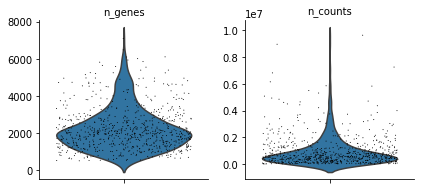

In [284]:
sc.pl.violin(adata, ['n_genes', 'n_counts'],jitter=0.4, multi_panel=True)

/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:318: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:319: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


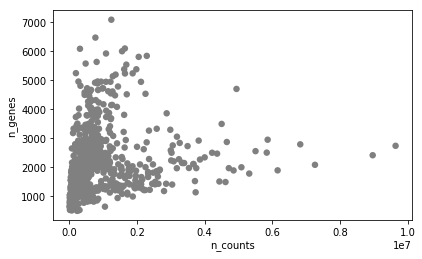

In [285]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

Because we're doing first exploratory pass let's remove cells that have more than 5000 genes given that those have higher chances of being doublets

In [286]:
#adata = adata[adata.obs['n_genes'] < 5000, :]

In [287]:
adata

AnnData object with n_obs × n_vars = 712 × 20781 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes', 'n_counts'
    var: 'n_cells'

Following the standard pipeline, next we normalize, log, compute highly variable genes and scale

In [288]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

In [289]:
sc.pp.log1p(adata)


In [290]:
adata.raw = adata

In [291]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

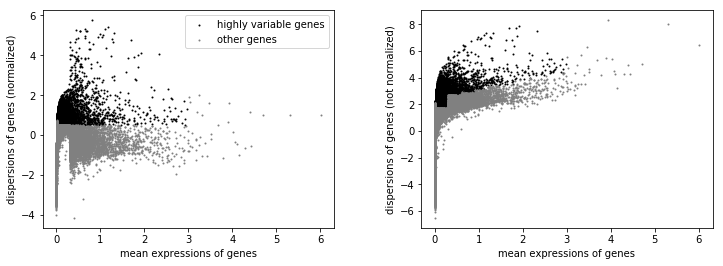

In [292]:
sc.pl.highly_variable_genes(adata)


In [293]:
adata


AnnData object with n_obs × n_vars = 712 × 20781 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [294]:
sc.pp.scale(adata, max_value=10)


Next we compute PCA

In [295]:
sc.tl.pca(adata, svd_solver='arpack')


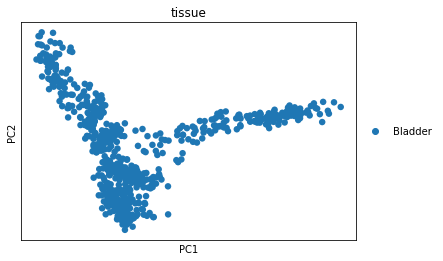

In [296]:
sc.pl.pca(adata, color='tissue')


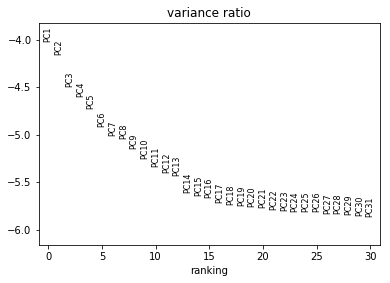

In [297]:
sc.pl.pca_variance_ratio(adata, log=True)


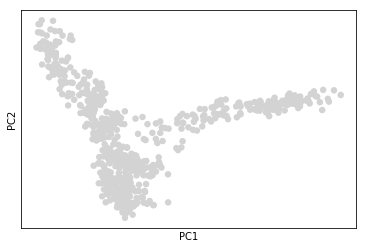

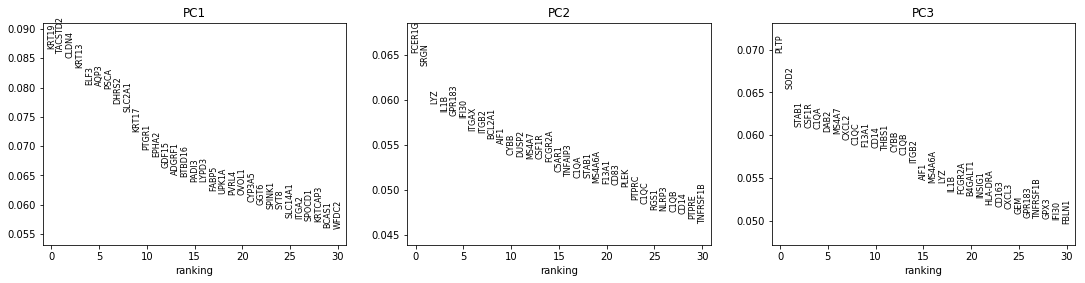

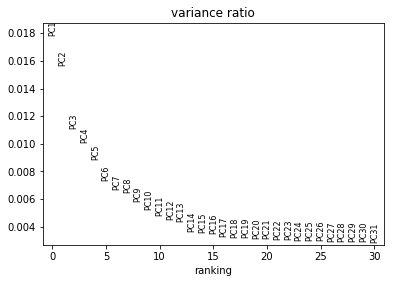

In [298]:
sc.pl.pca_overview(adata)

Now we're ready to start fishing out some structure in the data

In [299]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=13)


In [300]:
sc.tl.louvain(adata)
sc.tl.leiden(adata)

In [301]:
sc.tl.umap(adata)


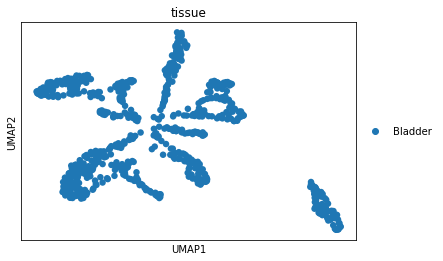

In [302]:
# sc.settings.set_figure_params(dpi=200)
sc.pl.umap(adata, color=['tissue'])

In [303]:
set(adata.obs['tissue'])

{'Bladder'}

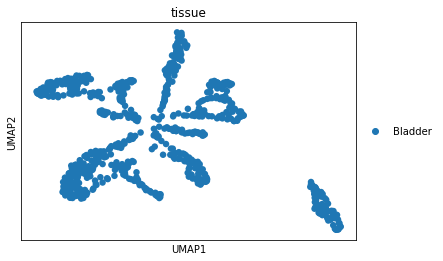

In [304]:
sc.pl.umap(adata, color=['tissue'],use_raw=False)

Let's take a look at one tissue as e.g. for batch effect...

In [305]:
adata.obs.columns

Index(['plate', 'well', 'tissue', 'primary_sort', 'anatomical_position',
       'sort_order', 'well_group', 'excluded', 'sort_direction',
       'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute',
       'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun',
       'additional_notes', 'n_genes', 'n_counts', 'louvain', 'leiden'],
      dtype='object')

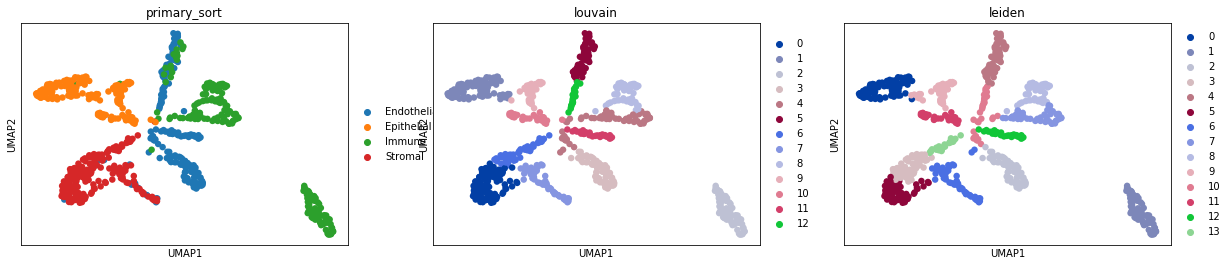

In [306]:
sc.pl.umap(adata, color=['primary_sort','louvain','leiden'])

Looking good! Into clustering...

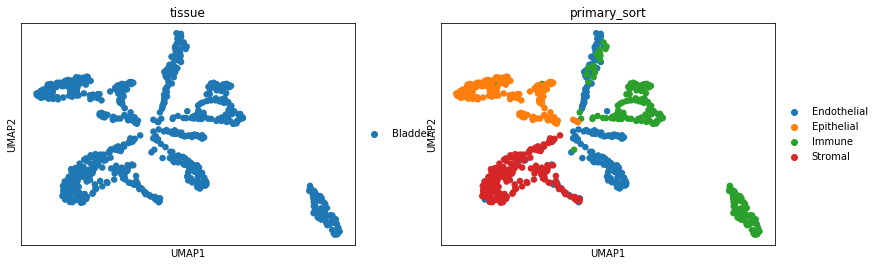

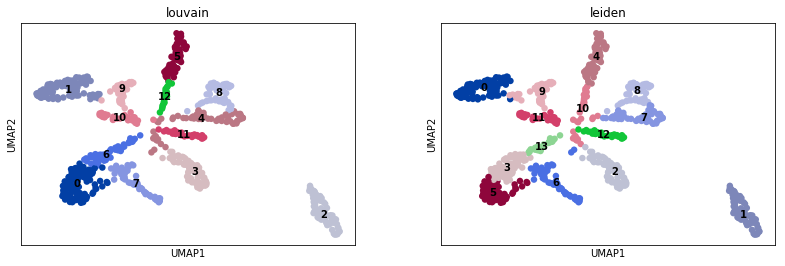

In [307]:
sc.pl.umap(adata, color=['tissue','primary_sort'])
sc.pl.umap(adata, color=['louvain','leiden'], legend_loc='on data')

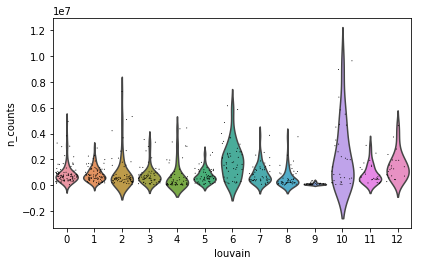

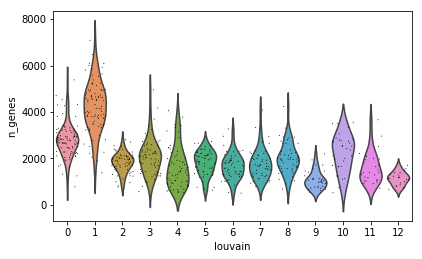

In [308]:
sc.pl.violin(adata, ['n_counts'],jitter=0.4, groupby='louvain')
sc.pl.violin(adata, ['n_genes'],jitter=0.4, groupby='louvain')

Using the wilcoxon rank test we can compute the marker genes for each of the 45 global clusters

In [309]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

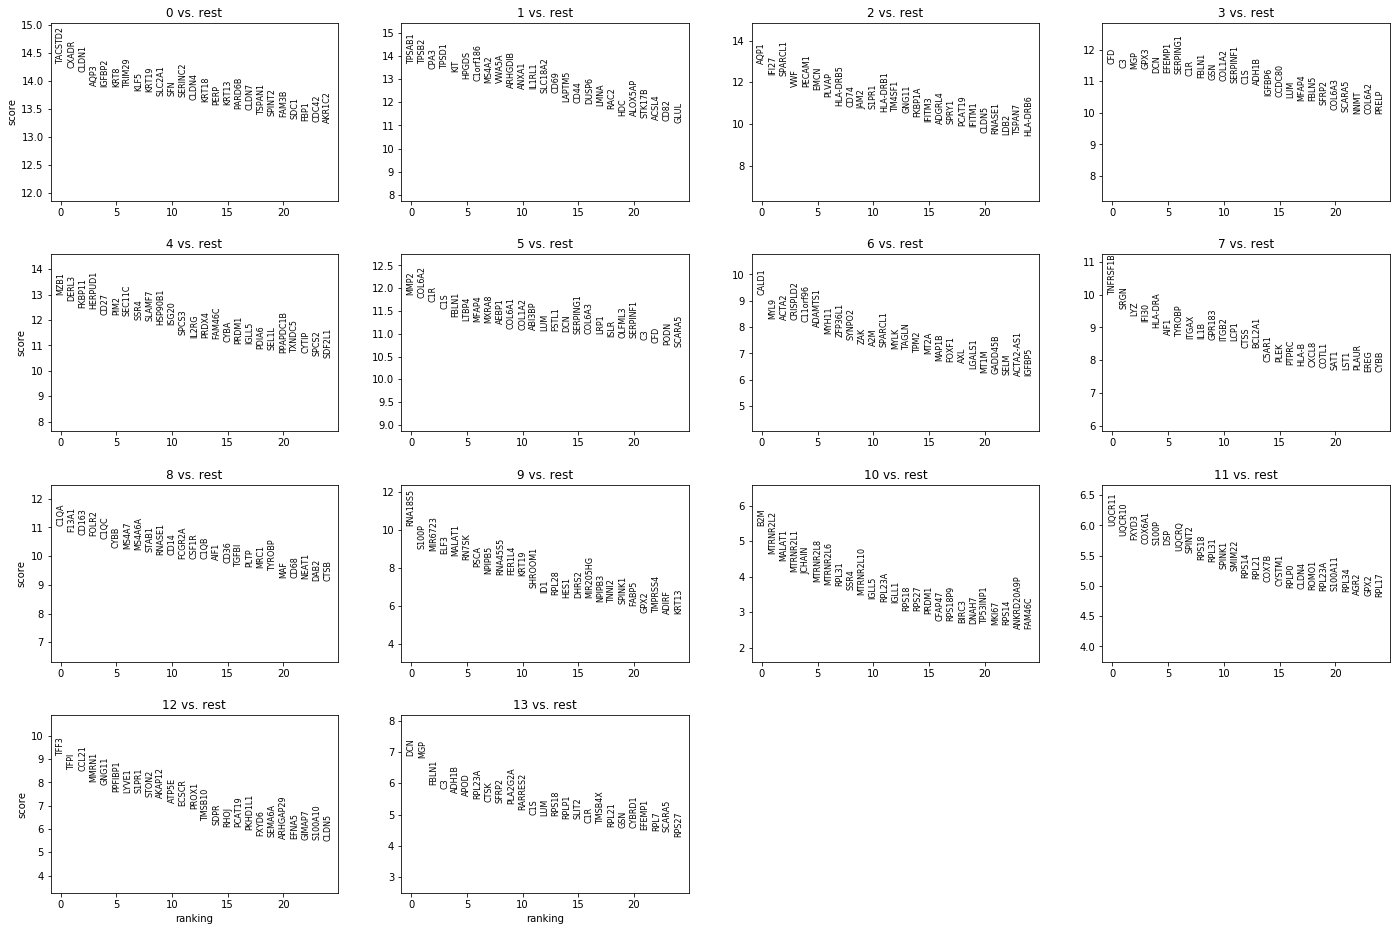

In [310]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [311]:
sapiens_rank_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
# sapiens_rank_genes.to_csv('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-global-rank-genes.csv')
sapiens_rank_genes.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,TACSTD2,TPSAB1,AQP1,CFD,MZB1,MMP2,CALD1,TNFRSF1B,C1QA,RNA18S5,B2M,UQCR11,TFF3,DCN
1,CXADR,TPSB2,IFI27,C3,DERL3,COL6A2,MYL9,SRGN,F13A1,S100P,MTRNR2L2,UQCR10,TFPI,MGP
2,CLDN1,CPA3,SPARCL1,MGP,FKBP11,C1R,ACTA2,LYZ,CD163,MIR6723,MALAT1,FXYD3,CCL21,FBLN1
3,AQP3,TPSD1,VWF,GPX3,HERPUD1,C1S,CRISPLD2,IFI30,FOLR2,ELF3,MTRNR2L1,COX6A1,MMRN1,C3
4,IGFBP2,KIT,PECAM1,DCN,CD27,FBLN1,C11orf96,HLA-DRA,C1QC,MALAT1,JCHAIN,S100P,GNG11,ADH1B
5,KRT8,HPGDS,EMCN,EFEMP1,PIM2,LTBP4,ADAMTS1,AIF1,CYBB,RN7SK,MTRNR2L8,DSP,PPFIBP1,APOD
6,TRIM29,C1orf186,PLVAP,SERPING1,SEC11C,MFAP4,MYH11,TYROBP,MS4A7,PSCA,MTRNR2L6,UQCRQ,LYVE1,RPL23A
7,KLF5,MS4A2,HLA-DRB5,C1R,SSR4,MXRA8,ZFP36L1,ITGAX,MS4A6A,NPIPB5,RPL31,SPINT2,S1PR1,CTSK
8,KRT19,VWA5A,CD74,FBLN1,SLAMF7,AEBP1,SYNPO2,IL1B,STAB1,RNA45S5,SSR4,RPS18,STON2,SFRP2
9,SLC2A1,ARHGDIB,JAM2,GSN,HSP90B1,COL6A1,ZAK,GPR183,RNASE1,FER1L4,MTRNR2L10,RPL31,AKAP12,PLA2G2A


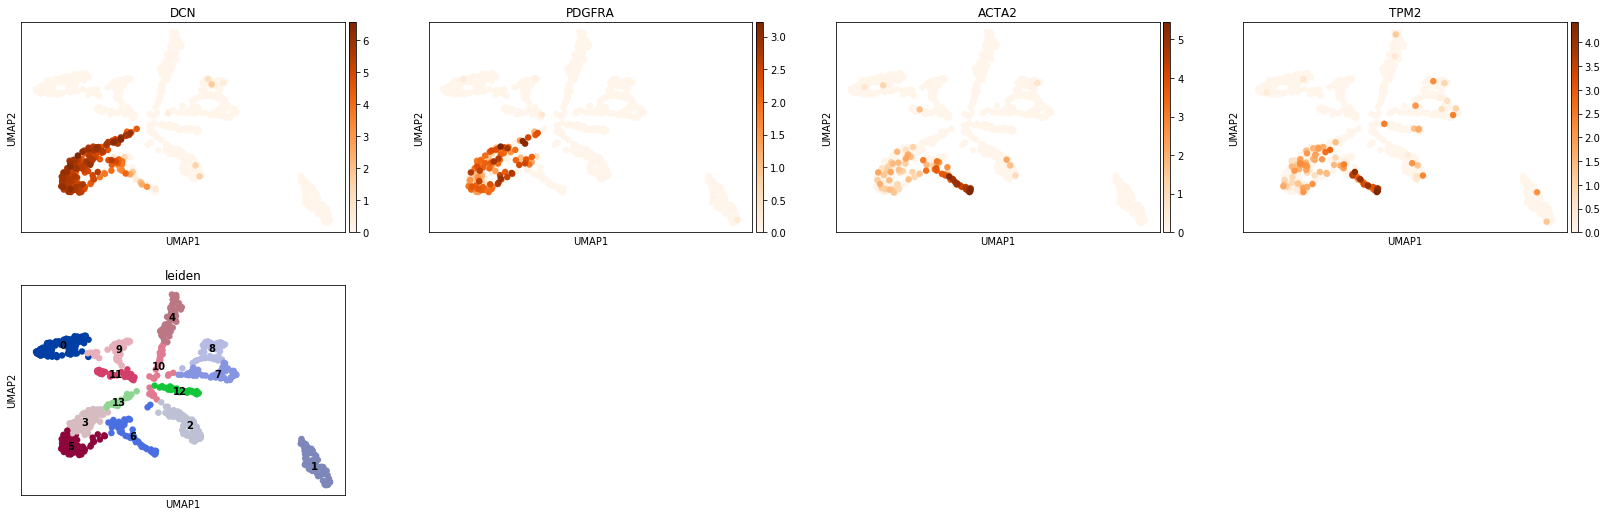

In [235]:
sc.pl.umap(adata,color=['DCN','PDGFRA','ACTA2','TPM2','leiden'],legend_loc='on data',cmap='Oranges')


In [ ]:
bladder_louvain_cell_ontology_facs = {}
bladder_louvain_cell_ontology_facs['0'] = 'mast cell (also has basophil marker)' #TPSAB1,TPSB2
bladder_louvain_cell_ontology_facs['1'] = 'endothelial' #PECAM1, VWF, CLDN5
bladder_louvain_cell_ontology_facs['2'] = 'unknown'
bladder_louvain_cell_ontology_facs['3'] = 'fibroblast' #DCN, PDGFRA
bladder_louvain_cell_ontology_facs['4'] = ''
bladder_louvain_cell_ontology_facs[''] = ''
bladder_louvain_cell_ontology_facs[''] = ''
bladder_louvain_cell_ontology_facs

In [312]:
bladder_leiden_cell_ontology_facs = {}
bladder_leiden_cell_ontology_facs['0'] = 'epithelial' #KRT8, KRT19, CDH1
bladder_leiden_cell_ontology_facs['1'] = 'mast cell (also has basophil marker)' #TPSAB1,TPSB2
bladder_leiden_cell_ontology_facs['2'] = 'endothelial' #PECAM1, VWF, CLDN5
bladder_leiden_cell_ontology_facs['3'] = 'fibroblast' #DCN, PDGFRA
bladder_leiden_cell_ontology_facs['4'] = 'plasma cell' # CD79A, CD27
bladder_leiden_cell_ontology_facs['5'] = 'fibroblast' #DCN, PDGFRA
bladder_leiden_cell_ontology_facs['6'] = 'muscle' # TPM2','MYH11,negative for DCN','PDGFRA
bladder_leiden_cell_ontology_facs['7'] = 'classical monocyte' # CD14
bladder_leiden_cell_ontology_facs['8'] = 'intermediate monocyte' #CD14, FCGR3A
bladder_leiden_cell_ontology_facs['9'] = 'nan' # dead epithelial cells
bladder_leiden_cell_ontology_facs['10'] = 'potential B cell in maturation' #CD27
bladder_leiden_cell_ontology_facs['11'] = 'epithelial' #CDH1, KRTs
bladder_leiden_cell_ontology_facs['12'] = 'lymphatic endothelial' #LYVE1, CLDN5
bladder_leiden_cell_ontology_facs['13'] = 'fibroblst' #positve for DCN','PDGFRA',negative for'ACTA2','TPM2
bladder_leiden_cell_ontology_facs

{'0': 'epithelial',
 '1': 'mast cell (also has basophil marker)',
 '2': 'endothelial',
 '3': 'fibroblast',
 '4': 'plasma cell',
 '5': 'fibroblast',
 '6': 'muscle',
 '7': 'classical monocyte',
 '8': 'intermediate monocyte',
 '9': 'nan',
 '10': 'potential B cell in maturation',
 '11': 'epithelial',
 '12': 'lymphatic endothelial',
 '13': 'fibroblst'}

Look at different cell types. The idea is to subcluster based on the global cell 

In [ ]:
bladder_epithelial = adata(adata.obs['leiden'].isin(['0','11']))

In [313]:
adata.obs['cell_ontology_class'] = adata.obs['leiden'].map(bladder_leiden_cell_ontology_facs)
set(adata.obs['cell_ontology_class'])

{'classical monocyte',
 'endothelial',
 'epithelial',
 'fibroblast',
 'fibroblst',
 'intermediate monocyte',
 'lymphatic endothelial',
 'mast cell (also has basophil marker)',
 'muscle',
 'nan',
 'plasma cell',
 'potential B cell in maturation'}

In [314]:
adata.write('./Bladder_facs_annotation_round_1.h5ad')

... storing 'cell_ontology_class' as categorical


# Annotate the DROPLET data

In [8]:
tiss = read_h5ad('../../data-analysis/pilot/10X/tabula-sapiens-10X-pilot-filtered-bladder.h5ad')

adata = tiss
adata

AnnData object with n_obs × n_vars = 17469 × 21380 
    obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes'
    var: 'n_cells'

In [237]:
igg_genes = adata.var_names[adata.var_names.str.startswith('IGH')]
igg_genes

Index(['IGHMBP2'], dtype='object', name='index')

In [238]:
ercc_genes = adata.var_names[adata.var_names.str.startswith('ERCC-')]
ercc_genes

Index([], dtype='object', name='index')

In [239]:
adata = adata[:,~adata.var_names.isin(ercc_genes)]
adata

View of AnnData object with n_obs × n_vars = 17469 × 21380 
    obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes'
    var: 'n_cells'

In [240]:
sc.pp.filter_cells(adata, min_genes=300)
sc.pp.filter_cells(adata, min_counts=2000)
sc.pp.filter_genes(adata, min_cells=3)

Trying to set attribute `.obs` of view, making a copy.


In [241]:
set(adata.obs['tissue'])

{'bladder'}

Compute the nUMIS (using 'n_counts' as generic column name)

In [242]:
adata.obs['n_counts'] = adata.X.sum(axis=1)#.A1

Look at the overall distribution of the data

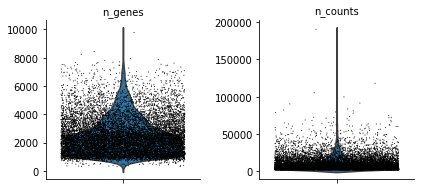

In [243]:
sc.pl.violin(adata, ['n_genes', 'n_counts'],jitter=0.4, multi_panel=True)

/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:318: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:319: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


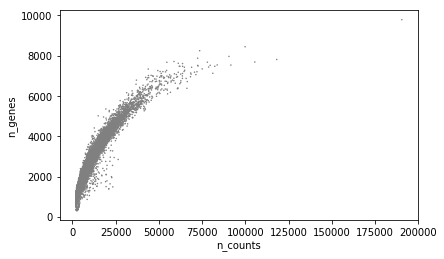

In [244]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

Because we're doing first exploratory pass let's remove cells that have more than 5000 genes given that those have higher chances of being doublets

In [245]:
#adata = adata[adata.obs['n_genes'] < 5000, :]

In [246]:
adata

AnnData object with n_obs × n_vars = 13158 × 19631 
    obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes', 'n_counts'
    var: 'n_cells'

Following the standard pipeline, next we normalize, log, compute highly variable genes and scale

In [247]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

In [248]:
sc.pp.log1p(adata)


In [249]:
adata.raw = adata

In [250]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

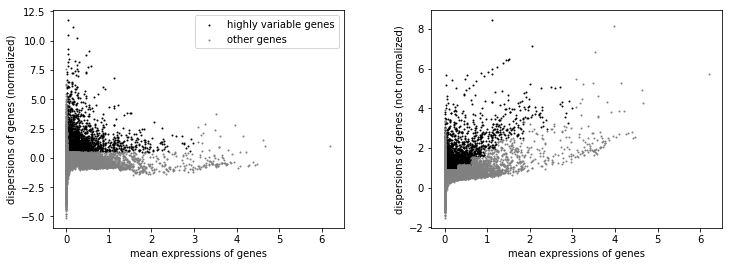

In [251]:
sc.pl.highly_variable_genes(adata)


In [252]:
adata


AnnData object with n_obs × n_vars = 13158 × 19631 
    obs: '10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [253]:
sc.pp.scale(adata, max_value=10)


Next we compute PCA

In [254]:
sc.tl.pca(adata, svd_solver='arpack')


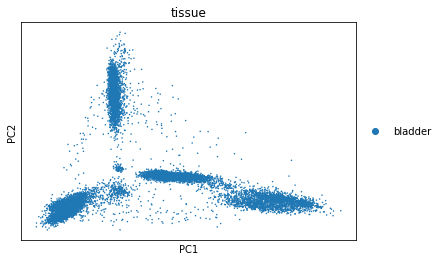

In [255]:
sc.pl.pca(adata, color='tissue')


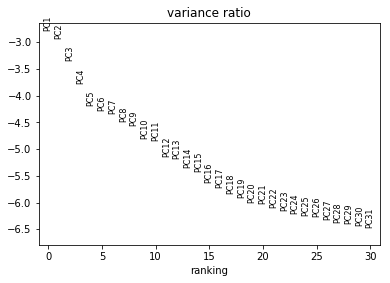

In [256]:
sc.pl.pca_variance_ratio(adata, log=True)


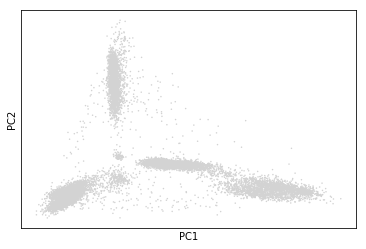

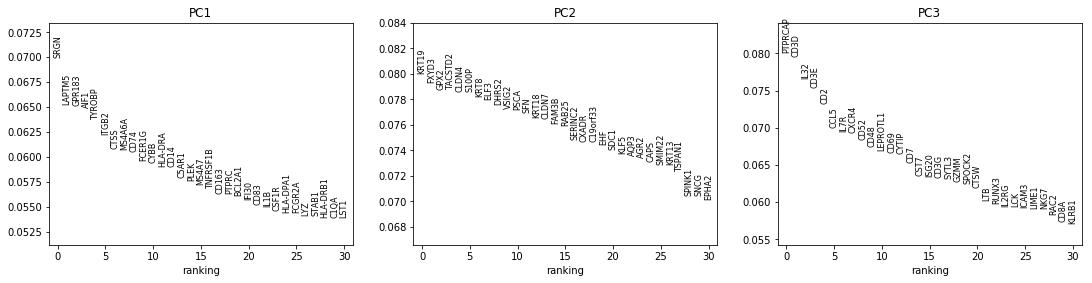

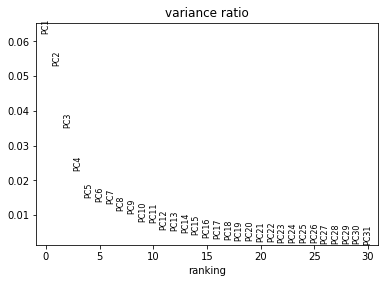

In [257]:
sc.pl.pca_overview(adata)

Now we're ready to start fishing out some structure in the data

In [259]:
sc.pp.neighbors(adata, n_neighbors=12, n_pcs=11)


In [260]:
sc.tl.louvain(adata)
sc.tl.leiden(adata)

In [261]:
sc.tl.umap(adata)


/home/ubuntu/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


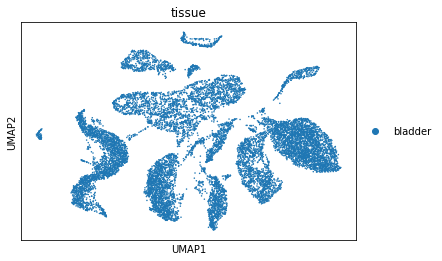

In [262]:
# sc.settings.set_figure_params(dpi=200)
sc.pl.umap(adata, color=['tissue'])

In [263]:
set(adata.obs['tissue'])

{'bladder'}

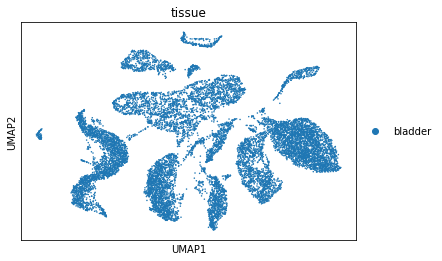

In [264]:
sc.pl.umap(adata, color=['tissue'],use_raw=False)

Let's take a look at one tissue as e.g. for batch effect...

In [265]:
adata.obs.columns

Index(['10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes',
       'n_counts', 'louvain', 'leiden'],
      dtype='object')

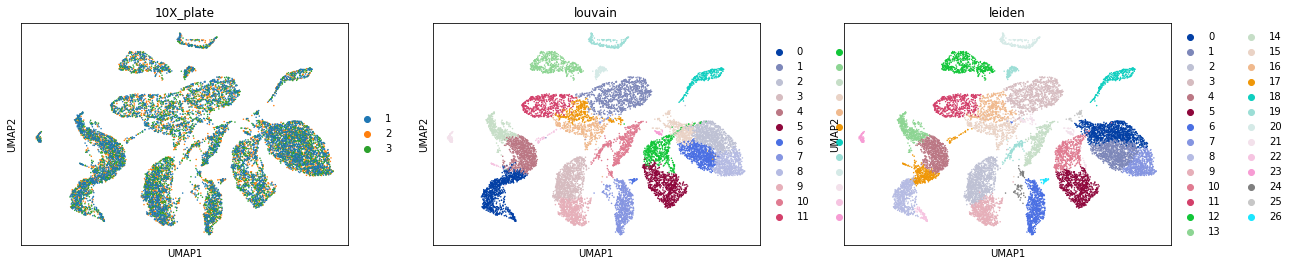

In [267]:
sc.pl.umap(adata, color=['10X_plate','louvain','leiden'])

Looking good! Into clustering...

In [270]:
adata.obs.columns

Index(['10X_plate', 'batch', 'tissue', 'method', 'sex', 'subjectid', 'n_genes',
       'n_counts', 'louvain', 'leiden'],
      dtype='object')

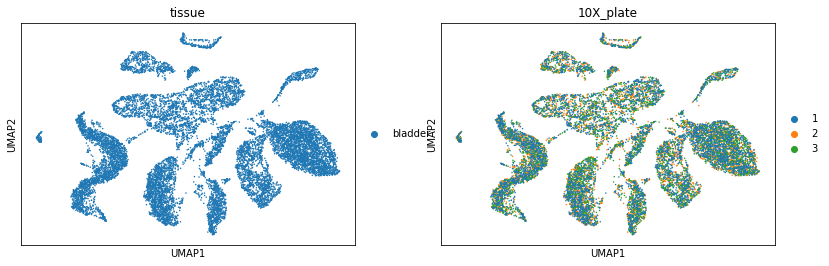

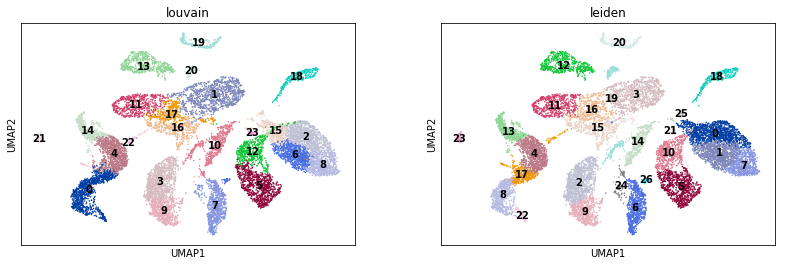

In [269]:
sc.pl.umap(adata, color=['tissue','10X_plate'])
sc.pl.umap(adata, color=['louvain','leiden'], legend_loc='on data')

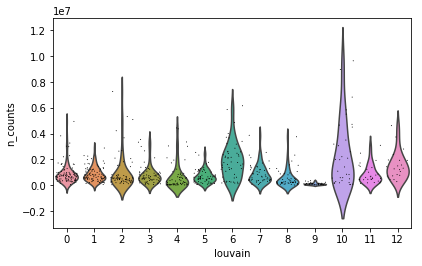

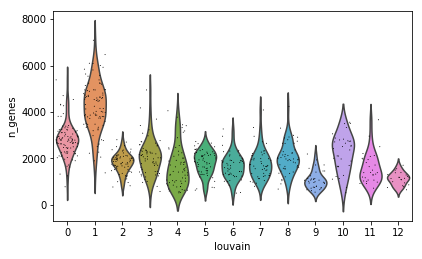

In [188]:
sc.pl.violin(adata, ['n_counts'],jitter=0.4, groupby='louvain')
sc.pl.violin(adata, ['n_genes'],jitter=0.4, groupby='louvain')

Using the wilcoxon rank test we can compute the marker genes for each of the 45 global clusters

In [214]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

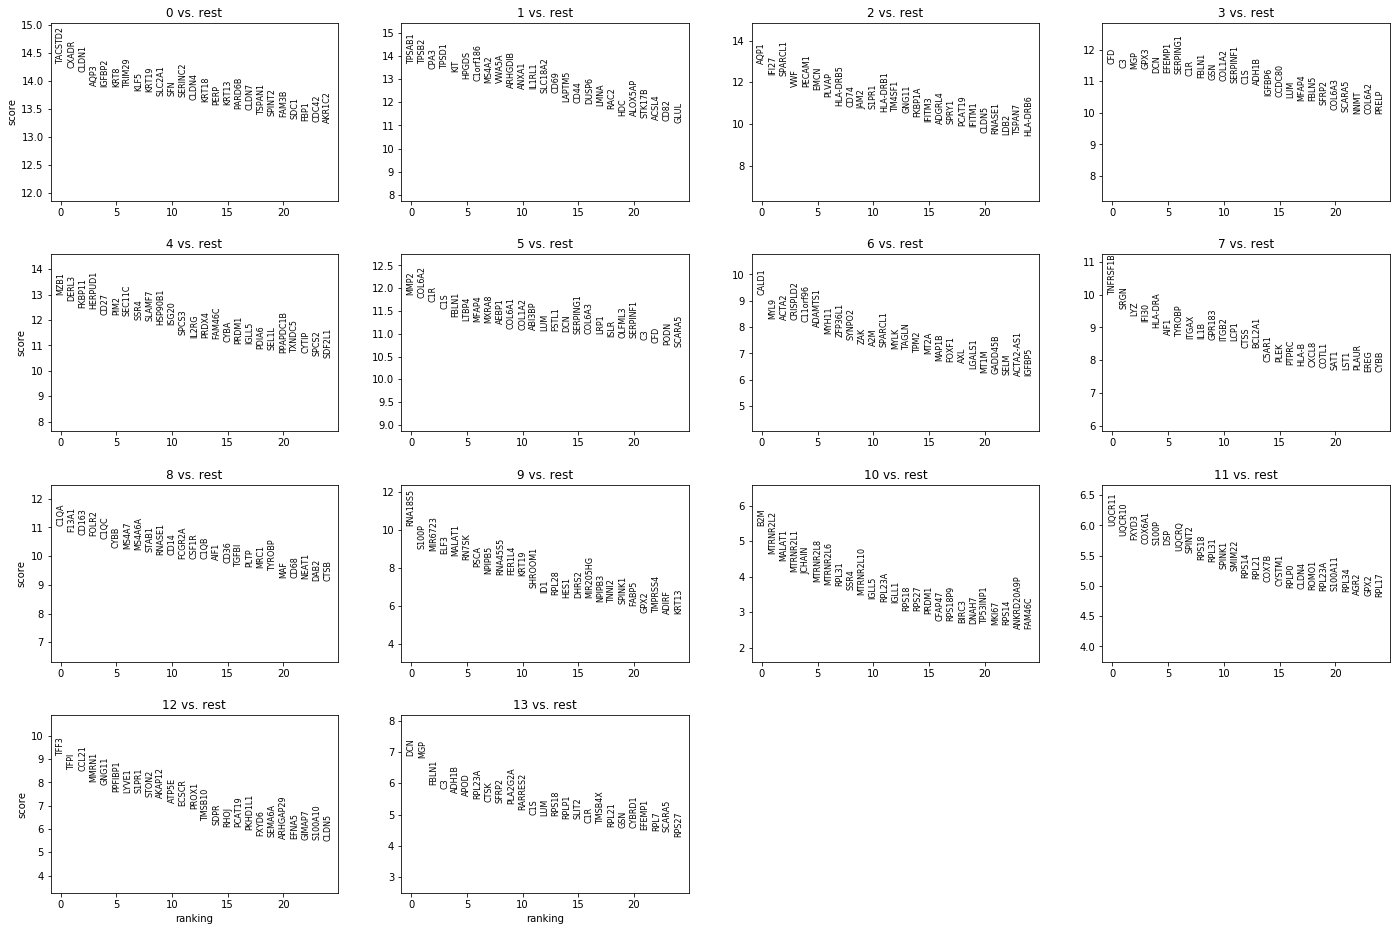

In [215]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [216]:
sapiens_rank_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
# sapiens_rank_genes.to_csv('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-global-rank-genes.csv')
sapiens_rank_genes.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,TACSTD2,TPSAB1,AQP1,CFD,MZB1,MMP2,CALD1,TNFRSF1B,C1QA,RNA18S5,B2M,UQCR11,TFF3,DCN
1,CXADR,TPSB2,IFI27,C3,DERL3,COL6A2,MYL9,SRGN,F13A1,S100P,MTRNR2L2,UQCR10,TFPI,MGP
2,CLDN1,CPA3,SPARCL1,MGP,FKBP11,C1R,ACTA2,LYZ,CD163,MIR6723,MALAT1,FXYD3,CCL21,FBLN1
3,AQP3,TPSD1,VWF,GPX3,HERPUD1,C1S,CRISPLD2,IFI30,FOLR2,ELF3,MTRNR2L1,COX6A1,MMRN1,C3
4,IGFBP2,KIT,PECAM1,DCN,CD27,FBLN1,C11orf96,HLA-DRA,C1QC,MALAT1,JCHAIN,S100P,GNG11,ADH1B
5,KRT8,HPGDS,EMCN,EFEMP1,PIM2,LTBP4,ADAMTS1,AIF1,CYBB,RN7SK,MTRNR2L8,DSP,PPFIBP1,APOD
6,TRIM29,C1orf186,PLVAP,SERPING1,SEC11C,MFAP4,MYH11,TYROBP,MS4A7,PSCA,MTRNR2L6,UQCRQ,LYVE1,RPL23A
7,KLF5,MS4A2,HLA-DRB5,C1R,SSR4,MXRA8,ZFP36L1,ITGAX,MS4A6A,NPIPB5,RPL31,SPINT2,S1PR1,CTSK
8,KRT19,VWA5A,CD74,FBLN1,SLAMF7,AEBP1,SYNPO2,IL1B,STAB1,RNA45S5,SSR4,RPS18,STON2,SFRP2
9,SLC2A1,ARHGDIB,JAM2,GSN,HSP90B1,COL6A1,ZAK,GPR183,RNASE1,FER1L4,MTRNR2L10,RPL31,AKAP12,PLA2G2A


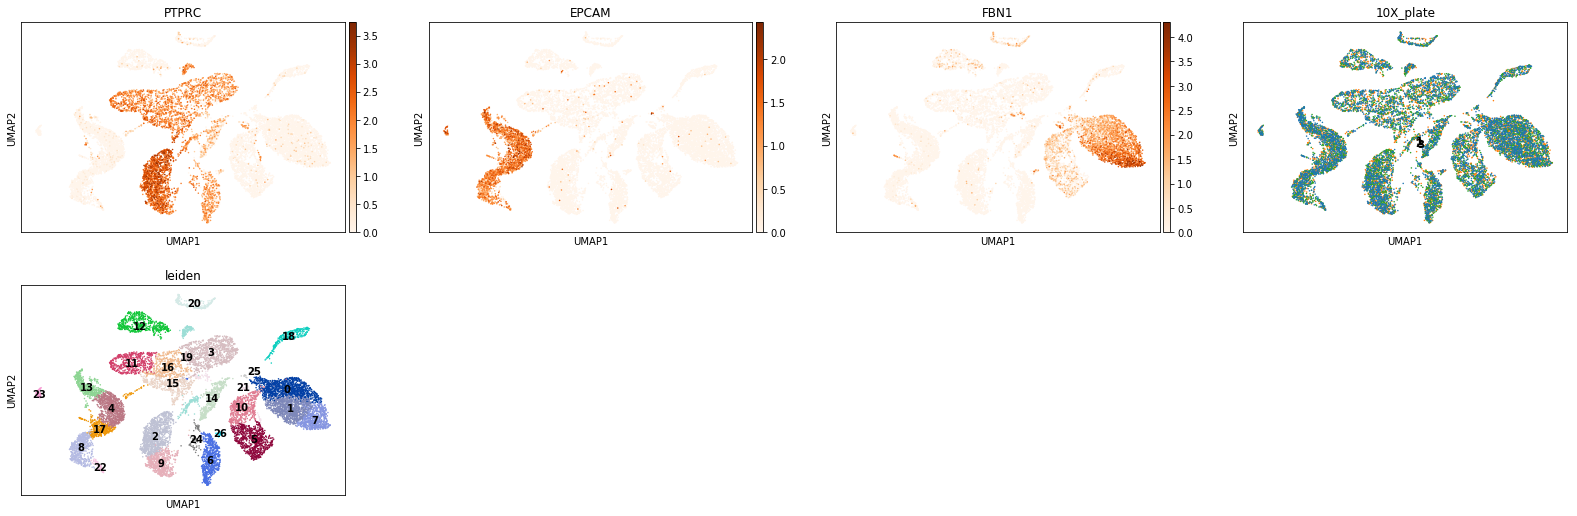

In [272]:
sc.pl.umap(adata,color=['PTPRC','EPCAM','FBN1','10X_plate','leiden'],legend_loc='on data',cmap='Oranges')


In [ ]:
bladder_louvain_cell_ontology_facs = {}
bladder_louvain_cell_ontology_facs['0'] = 'mast cell (also has basophil marker)' #TPSAB1,TPSB2
bladder_louvain_cell_ontology_facs['1'] = 'endothelial' #PECAM1, VWF, CLDN5
bladder_louvain_cell_ontology_facs['2'] = 'unknown'
bladder_louvain_cell_ontology_facs['3'] = 'fibroblast' #DCN, PDGFRA
bladder_louvain_cell_ontology_facs['4'] = ''
bladder_louvain_cell_ontology_facs[''] = ''
bladder_louvain_cell_ontology_facs[''] = ''
bladder_louvain_cell_ontology_facs

In [ ]:
bladder_leiden_cell_ontology_facs = {}
bladder_leiden_cell_ontology_facs['0'] = 'epithelial' #KRT8, KRT19, CDH1
bladder_leiden_cell_ontology_facs['1'] = 'mast cell (also has basophil marker)' #TPSAB1,TPSB2
bladder_leiden_cell_ontology_facs['2'] = 'endothelial' #PECAM1, VWF, CLDN5
bladder_leiden_cell_ontology_facs['3'] = 'fibroblast' #DCN, PDGFRA
bladder_leiden_cell_ontology_facs['4'] = 'plasma cell' # CD79A, CD27
bladder_leiden_cell_ontology_facs['5'] = 'fibroblast' #DCN, PDGFRA
bladder_leiden_cell_ontology_facs['6'] = 'muscle' # TPM2','MYH11,negative for DCN','PDGFRA
bladder_leiden_cell_ontology_facs['7'] = 'classical monocyte' # CD14
bladder_leiden_cell_ontology_facs['8'] = 'intermediate monocyte' #CD14, FCGR3A
bladder_leiden_cell_ontology_facs['9'] = 'nan' # dead epithelial cells
bladder_leiden_cell_ontology_facs['10'] = 'potential B cell in maturation' #CD27
bladder_leiden_cell_ontology_facs['11'] = 'epithelial' #CDH1, KRTs
bladder_leiden_cell_ontology_facs['12'] = 'lymphatic endothelial' #LYVE1, CLDN5
bladder_leiden_cell_ontology_facs['13'] = 'fibroblst' #positve for DCN','PDGFRA',negative for'ACTA2','TPM2
bladder_leiden_cell_ontology_facs

Look at different cell types. The idea is to subcluster based on the global cell 

In [ ]:
bladder_epithelial = adata(adata.obs['leiden'].isin(['0','11']))

In [ ]:
adata.obs['cell_ontology_class'] = adata.obs['leiden'].map(pancreas_endocrine_leiden_cell_ontology_facs)
set(adata.obs['cell_ontology_class'])

In [274]:
adata.obs

,10X_plate,batch,tissue,method,sex,subjectid,n_genes,n_counts,louvain,leiden
index,,,,,,,,,,
AAACCCAAGACTCCGC-1-11,2,11,bladder,droplet,female,pilot,906,2475.0,3,2
AAACCCAAGCATGATA-1-11,2,11,bladder,droplet,female,pilot,3188,12231.0,4,4
AAACCCAAGGTAGATT-1-11,2,11,bladder,droplet,female,pilot,3586,18352.0,4,13
AAACCCACACTCCCTA-1-11,2,11,bladder,droplet,female,pilot,4163,20051.0,4,4
AAACCCAGTAGGCTGA-1-11,2,11,bladder,droplet,female,pilot,2068,6998.0,12,10
AAACCCAGTGGACAGT-1-11,2,11,bladder,droplet,female,pilot,1745,5495.0,3,2
AAACCCATCATAAGGA-1-11,2,11,bladder,droplet,female,pilot,2709,8878.0,5,5
AAACCCATCGAACGCC-1-11,2,11,bladder,droplet,female,pilot,3746,18710.0,4,4
AAACCCATCGCATGAT-1-11,2,11,bladder,droplet,female,pilot,1272,3581.0,3,2
